<center>
<h1>5SSG2059 Geocomputation</h1>
<h2>Practical 6: Data Manipulation</h2>
</center>

# Manipulating Data

As we've discussed in lectures, manipulating data can be a major component of data analysis. This week will look at some further ways to manipulate data that might be useful for you when analysing the data for your final report. 

Specifically we will:
1. recap some useful sorting and selecting methods
2. see how we can combine two `DataFrames` together using common properties for further analysis
3. look at how we can group data for analysis (e.g. grouping LSOAs for borough-level analysis)

## Setup

As usual we will be using pandas and doing some data analysis plotting, so we need to import the relevant packages (note the aliases used for reference below):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We will start working with the initial LSOA data that we have been using previously:

In [2]:
my_df = pd.read_csv(
    'https://github.com/kingsgeocomp/geocomputation/blob/master/data/LSOA%20Data.csv.gz?raw=true',
    compression='gzip', low_memory=False) # The 'low memory' option means pandas doesn't guess data types

Later we'll look at how we can add more data to this `DataFrame` later, but first let's just check what columns of data we have:

In [3]:
my_df.columns

Index(['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM',
       'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN',
       'HHOLDS', 'AVHHOLDSZ', 'geometry', 'GreenspaceArea', 'RoadsArea',
       'Owned', 'SharedOwnshp', 'SocialRented', 'PrivateRented', 'RentFree',
       'ORroomsM1', 'ORbedsM1', 'RoomsHH', 'BedsHH', 'White', 'MultiEthnic',
       'Asian', 'Black', 'OtherEthnic', 'MedianIncome', 'SumPrice',
       'MeanPrice', 'MedianPrice', 'EntireHome', 'PrivateRoom', 'SharedRoom',
       'SmallHost', 'MultiHost', 'PropertyCount', 'Area'],
      dtype='object')

Okay, now we have our data loaded and we've reminded ourselves of what the data set contains (maybe by consulting the [metadata](https://github.com/kingsgeocomp/geocomputation/raw/master/Data/LSOA_metadata.xlsx)) we can move on. 

## Quick Recap: Sorting and Selecting 

#### Task 1:
Write some code to list the **LSOA11 Names** and **Population Densities** where the population density is more than **four standard deviations greater than the mean** population density of all London LSOAs: 

In [4]:
my_df[my_df.POPDEN > my_df.POPDEN.mean()+4*my_df.POPDEN.std()][['LSOA11NM','POPDEN']]

,LSOA11NM,POPDEN
1717,Hackney 016C,344.8
1861,Hammersmith and Fulham 015B,378.7
1910,Hammersmith and Fulham 002C,368.1
2777,Kensington and Chelsea 021C,684.7
2797,Kensington and Chelsea 014E,351.5
4132,Tower Hamlets 008A,345.6
4164,Tower Hamlets 012E,345.1
4194,Tower Hamlets 025C,399.0
4538,Westminster 017A,391.5
4618,Westminster 024E,463.2


Hopefully, your code returns 19 LSOAs.

Good, now what about if we want to find the top 10 LSOAs in terms of population density, and examine how many households there are in those LSOAs? Recall that we did this last week in one line:

In [5]:
my_df.sort_values(by='POPDEN', ascending=False).head(10)[['LSOA11NM','POPDEN','HHOLDS']]

,LSOA11NM,POPDEN,HHOLDS
2777,Kensington and Chelsea 021C,684.7,514
4747,Islington 011F,502.5,595
4618,Westminster 024E,463.2,950
4689,Tower Hamlets 032D,461.8,852
4631,Westminster 022D,437.0,905
4194,Tower Hamlets 025C,399.0,637
4793,Westminster 014F,394.1,614
4538,Westminster 017A,391.5,958
4705,Hammersmith and Fulham 023E,384.9,586
1861,Hammersmith and Fulham 015B,378.7,875


Take a look at that line of code and check you can see how the different lines previously have been combined. 

Let's pull it apart step-by-step at the code level:

* The first step in this process is `my_df.sort_values` -- you can probably guess what this does: it sorts the data frame!
* The parameters passed to the `sort_values` function are `by`, which is the column on which to sort, and `ascending=False`, which gives us the data frame sorted in _descending_ order!
* The output of `my_df.sort(...)` is a _new_ data frame, which means that we can simply add `.head(10)` to get the first ten rows of the newly-sorted data frame.
* And the output of `my_df.sort(...).head(...)` is yet _another_ data frame, which means that we can print out the values of selected columns using the 'dictionary-like' syntax: we use the outer set of square brackets (`[...]`) to tell pandas that we want to access a subset of the top-10 data frame, and we use the inner set of square brackets (`['LSOA11NM','POPDEN','HHOLDS']`) to tell pandas which columns we want to see.

I'd say 'simples, right?' but that's obviously _not_ simple. It _is_, however, very, very _elegant_ because it's quite clear (once you get past the way that lots of methods can be chained together) and it's very succinct (we did all of that in _one_ line of code!).

#### Task 2:
In a single line of code create a new `df` containing information about the name, population density and number of usual residents for the seven least populated LSOAs (in terms of usual residents). Then use another line of code to print the new `df`: 

## Taking a Random Sample of Data

Of course, sometimes you don't want a particular range of data, you want a _random sample_ so that you can either 
a. get a better sense of the data, or 
b. perform some kind of test with a subsample before replicating on the full data set. 

Pandas has [got you covered](http://pandas.pydata.org/pandas-docs/version/0.18.1/indexing.html#selecting-random-samples) with a huge range of options, including sampling with replacement, sample weights, row numbers and a fraction of the data set. 

Let's look at some simple examples:

In [6]:
my_df.sample(n=5)[ ['LSOA11NM','POPDEN','USUALRES'] ] # Sample of size 5

,LSOA11NM,POPDEN,USUALRES
396,Bexley 005B,49.2,1536
3923,Southwark 026C,169.5,2319
3632,Redbridge 034D,49.3,1712
4352,Waltham Forest 012E,139.5,2003
1642,Greenwich 006E,97.1,1948


In [7]:
my_df.sample(n=5)[ ['LSOA11NM','POPDEN','USUALRES'] ] # This will not give you the same sample

,LSOA11NM,POPDEN,USUALRES
3539,Newham 023C,248.8,1667
4467,Wandsworth 004C,192.6,2092
1604,Greenwich 007D,78.8,1661
2013,Haringey 036B,112.5,1587
4608,Westminster 003E,270.7,1638


Note that even though the two lines of code above are identical we return a different (random) sample of rows. This is useful but what if we want to give our code to someone else to that they would get the same (random) sample of rows?  To do this we can specify the `random_state` argument:

In [8]:
my_df.sample(n=5, random_state=42)[ ['LSOA11NM','POPDEN','HHOLDS'] ] 

,LSOA11NM,POPDEN,HHOLDS
3317,Merton 014B,153.6,544
2533,Hounslow 022C,52.2,726
1041,Croydon 034C,10.4,657
3307,Merton 016B,93.9,720
4401,Wandsworth 019B,129.8,618


By specifying the same value for `random_state` we will get the same sample: 

In [9]:
my_df.sample(n=5, random_state=42)[ ['LSOA11NM','POPDEN','HHOLDS'] ] 

,LSOA11NM,POPDEN,HHOLDS
3317,Merton 014B,153.6,544
2533,Hounslow 022C,52.2,726
1041,Croydon 034C,10.4,657
3307,Merton 016B,93.9,720
4401,Wandsworth 019B,129.8,618


And using a different value for `random_state` gives us a different sample:

In [10]:
my_df.sample(n=5, random_state=43)[ ['LSOA11NM','POPDEN','HHOLDS'] ] 

,LSOA11NM,POPDEN,HHOLDS
4570,Westminster 019D,59.2,627
3724,Richmond upon Thames 005D,44.2,657
1296,Ealing 003B,87.0,620
848,Camden 009A,139.5,926
3036,Lambeth 004C,196.6,777


We can also specify the fraction of the `DataFrame` we want to sample, rather than an absolute number of observations (think about why this is useful for when we don't know what size `DataFrame` our code might be used with):

In [11]:
my_df.sample(frac=0.002)[ ['LSOA11NM','POPDEN','USUALRES'] ] # Sample a fraction of the rows (here 0.2%)

,LSOA11NM,POPDEN,USUALRES
1919,Haringey 014A,94.2,1655
1277,Ealing 017D,72.4,1814
3840,Southwark 021F,133.0,1423
626,Brent 024B,172.2,2123
3174,Lewisham 001B,141.6,1559
22,Barking and Dagenham 008D,103.9,1336
1169,Croydon 014D,97.5,1833
3589,Redbridge 007E,78.1,1430
1836,Hammersmith and Fulham 017D,112.3,1485
295,Barnet 019B,94.1,1632


Finally, the code above has automatically been sampling rows of data, but we can also sample columns by specifying the `axis` of the `DataFrame` we want to sample: 

In [12]:
my_df.sample(n=5, axis=1).head(10)

,SharedOwnshp,MedianPrice,LSOA11NM,RoomsHH,RoadsArea
0,3.0,146.0,City of London 001A,3.6,133320.768859
1,8.0,117.5,City of London 001B,3.8,194100.905007
2,1.0,89.5,City of London 001C,2.8,55940.369377
3,0.0,95.0,City of London 001E,3.3,190738.760508
4,0.0,30.0,Barking and Dagenham 016A,5.1,28697.713385
5,16.0,25.0,Barking and Dagenham 015A,3.3,198114.063345
6,1.0,44.0,Barking and Dagenham 015B,4.3,155007.809210
7,4.0,27.0,Barking and Dagenham 016B,4.4,120065.810348
8,18.0,40.0,Barking and Dagenham 015C,3.4,323053.135993
9,7.0,40.0,Barking and Dagenham 016C,4.9,90297.679798


## Combining Data

Up until this point we have been working with a dataset of ~48 variables (columns) for the LSOAs. But what if we have additional data for LSOAs that we want to work with together with our original data, for example to look for correlations between variables. Here we will look at how to combine two datasets that have data for individual LSOAs:
1. our original data
2. data for air quality in each LSOA

Combining these data would be useful, for example, to examine relationships between air quality and socio-economic and other variables. 

When joining two data sets, each of the following functions does something _slightly_ different, though they can all produce the _same output_:
- `pd.merge` enables us to [combine](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging) two dataframes based on a column that is common between them
- `pd.concatenate` [combines](http://pandas.pydata.org/pandas-docs/stable/merging.html#concatenating-objects) dataframes regardless of common attributes. 
- `df.join` is used to [combine](http://pandas.pydata.org/pandas-docs/stable/merging.html#joining-on-index) two dataframes when they share a common `index` (e.g. a `DateTimeIndex` in timeseries data)
Notice that `merge` and `concatenate` are functions associated with the pandas library, while `join` is a method associated with a data frame. We'll then look at how to analyse variables in the combined `DataFrame` we produce using correlation later in the module. 

## Air Quality Data

Metadata about the air quality data are included in the [metadata](https://github.com/kingsgeocomp/geocomputation/blob/master/data/LSOA_metadata.xlsx?raw=true) file. The data themselves are hosted online and can be read using:

In [13]:
aq_df = pd.read_csv(
    'https://github.com/kingsgeocomp/geocomputation/blob/master/data/LSOA_AirQuality.csv.gz?raw=true',
    compression='gzip', low_memory=False) # The 'low memory' option means pandas doesn't guess data types

In [14]:
aq_df.head()

,LSOA11CD,PM25mean,PM25min,PM25max,PM25sd,PM10mean,PM10min,PM10max,PM10sd,NOxmean,NOxmin,NOxmax,NOxsd,NO2mean,NO2min,NO2max,NO2sd
0,E01000001,18.6339,17.6449,23.1297,1.0451,29.6152,27.2757,40.9147,2.5343,116.7335,74.3843,368.4532,46.8249,57.8972,43.0877,127.2501,14.9486
1,E01000002,17.8920,17.5738,20.0114,0.4147,27.8759,27.1356,32.2687,0.9467,86.3397,72.6057,191.7217,17.0302,47.6356,42.3820,80.7450,6.3878
2,E01000003,17.8823,17.5894,20.2573,0.3984,27.8970,27.1989,33.6703,1.0226,86.1607,74.2665,189.0205,17.5927,47.3078,42.9148,81.4941,6.0950
3,E01000005,18.4486,17.5878,30.7432,1.4506,29.7238,27.2533,59.8320,3.8027,132.1101,76.5674,893.0905,89.5282,61.1162,43.7231,234.1228,23.2659
4,E01000006,15.7733,15.6290,15.9539,0.0666,24.5767,24.3273,25.0226,0.1474,51.3147,46.9127,57.4380,2.1936,32.5846,31.1267,34.9157,0.7742


#### Task 3:

Familiarise yourself with the data you have just loaded in and compare it to the data we have worked with previously. To do this you might:

1. check the column names and data types of the air quality data file and compare to the metadata file (hint: use `info()` method for `DataFrame`s - you might need to google this)  

In [15]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 17 columns):
LSOA11CD    4835 non-null object
PM25mean    4835 non-null float64
PM25min     4835 non-null float64
PM25max     4835 non-null float64
PM25sd      4835 non-null float64
PM10mean    4835 non-null float64
PM10min     4835 non-null float64
PM10max     4835 non-null float64
PM10sd      4835 non-null float64
NOxmean     4835 non-null float64
NOxmin      4835 non-null float64
NOxmax      4835 non-null float64
NOxsd       4835 non-null float64
NO2mean     4835 non-null float64
NO2min      4835 non-null float64
NO2max      4835 non-null float64
NO2sd       4835 non-null float64
dtypes: float64(16), object(1)
memory usage: 642.3+ KB


2. calculate descriptive statistics for the air quality data 

In [16]:
aq_df.describe()

,PM25mean,PM25min,PM25max,PM25sd,PM10mean,PM10min,PM10max,PM10sd,NOxmean,NOxmin,NOxmax,NOxsd,NO2mean,NO2min,NO2max,NO2sd
count,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000
mean,15.933692,15.663149,18.791063,0.417154,25.081174,24.427725,32.410070,1.074251,60.067193,49.747635,175.898430,16.469051,36.015590,32.388520,71.426087,5.442446
std,0.747620,0.644695,2.767815,0.316205,1.332229,1.034080,6.057279,0.808448,16.524965,10.552390,163.822116,13.330336,6.516267,4.674863,28.459356,3.934605
min,14.320600,14.035100,14.626100,0.028200,22.208700,21.632900,22.785200,0.063400,27.853100,23.437500,35.656800,0.975100,21.684400,19.153200,24.710500,0.385900
25%,15.399250,15.204750,17.202900,0.202350,24.115550,23.677600,28.535350,0.513050,48.577450,42.097450,107.646950,7.188150,31.362050,29.002650,52.610150,2.606750
50%,15.819100,15.575500,18.291300,0.349300,24.886200,24.314600,31.260400,0.906100,56.812700,48.466900,150.183900,13.043000,35.043200,31.980100,66.588400,4.584300
75%,16.373850,16.054050,19.731650,0.537950,25.853150,25.096200,34.886000,1.413200,68.332950,56.316650,217.482500,21.994050,39.678750,35.510300,84.813500,7.271400
max,19.523700,18.641100,110.827100,2.279000,31.353200,28.658600,119.399400,5.808300,168.368200,93.074000,9237.618200,137.826800,70.707000,49.975300,643.045700,29.369500


3. compare the shapes of the two `DataFrames`

In [17]:
print(my_df.shape)
print(aq_df.shape)

(4835, 42)
(4835, 17)


From your exploration of the new data and comparison with the original LSOA data you might notice a few things:
1. They have the same number of rows
2. They have different numbers of columns
3. They share one column name in common (`LSOA11CD`)

Check you can see these observations for yourself. 

4. create a single distribution plot for all PM25 measures _except_ the Standard Deviation

To quickly find all of the PM25 measures you might want to read up on 'list comprehensions' ([here](https://medium.com/better-programming/list-comprehension-in-python-8895a785550b) and [here](https://medium.com/quick-code/advanced-python-made-easy-eece317334fa)) and then have a look at [this StackOverflow answer](https://stackoverflow.com/questions/44357731/filter-list-of-strings-starting-with-specific-keyword).

_Note:_ this can be done in as few as three lines, though you might find it easier to _first_ find the columns as a list and _then_ iterate over these while creating a `distplot` for each. Don't forget to add the legend!

In [18]:
# This is called a 'list comprehension' and it's one of
# the powerful techniques for processing/extracting data
# in/from lsits
cols = [x for x in aq_df.columns.values.tolist() if x.startswith('PM25') and not x.endswith('sd')]
print(cols)

['PM25mean', 'PM25min', 'PM25max']


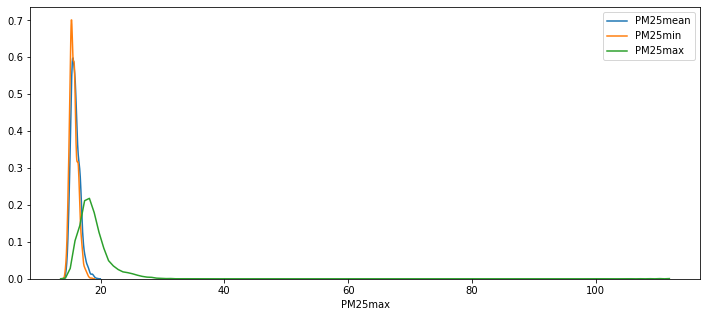

In [19]:
f, ax = plt.subplots(1, figsize=(12, 5))
for c in cols:
    sns.distplot(aq_df[c], kde=True, hist=False, label=c)

### Merge

If we have columns in each dataframes that contain the same identifiers, then we can use this column to define how the two dfs should be joined together. For example, the data we are working with are for LSOAs (distinct geographical regions) - if any additional data we have is also for LSOAs, as long as we we have a common way of identifying the LSOAs in each dataframe we can `merge` them. 

Hopefully from the task above that we have a common identifier in both the orginal data `my_df` and the new air qualiy data `aq_df`: `LSOA11CD`. The `LSOA11CD` is a unique identifier code for each LSOA. We can use this to match rows of data in `my_df` (each of which is for a particular LSOA) with the corresponding rows in `aq_df` (which are also for individual LSOAs).

With the common identifier identified, we now need to decide what type of join we want to do. Recall from this week's lecture that there are four main types of 'join':
1. left
2. right
3. outer
4. inner

We could use any of the above depending on our objectives. 

Here we'll do a **left join**, where the left `df` will be the original data and the right `df` will be our new air quality data. If we had more rows in the _left_ data set then this would ensure that we didn't lose them when they didn't find a match in the _right_ data set.

In [20]:
merge_df = pd.merge(my_df, aq_df, how='left', on='LSOA11CD')

Okay, now let's check what the columns are in the new `DataFrame` we just created: 

In [21]:
print(merge_df.columns)

Index(['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM',
       'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN',
       'HHOLDS', 'AVHHOLDSZ', 'geometry', 'GreenspaceArea', 'RoadsArea',
       'Owned', 'SharedOwnshp', 'SocialRented', 'PrivateRented', 'RentFree',
       'ORroomsM1', 'ORbedsM1', 'RoomsHH', 'BedsHH', 'White', 'MultiEthnic',
       'Asian', 'Black', 'OtherEthnic', 'MedianIncome', 'SumPrice',
       'MeanPrice', 'MedianPrice', 'EntireHome', 'PrivateRoom', 'SharedRoom',
       'SmallHost', 'MultiHost', 'PropertyCount', 'Area', 'PM25mean',
       'PM25min', 'PM25max', 'PM25sd', 'PM10mean', 'PM10min', 'PM10max',
       'PM10sd', 'NOxmean', 'NOxmin', 'NOxmax', 'NOxsd', 'NO2mean', 'NO2min',
       'NO2max', 'NO2sd'],
      dtype='object')


And let's check from a sample of the data how the rows look: 

In [22]:
merge_df.sample(n=5, random_state=42)[ 
    ['LSOA11NM','POPDEN','HHOLDS', 'PM25mean', 'PM25min', 'PM25max', 'PM25sd'] ] 

,LSOA11NM,POPDEN,HHOLDS,PM25mean,PM25min,PM25max,PM25sd
3317,Merton 014B,153.6,544,15.7395,15.6243,16.9129,0.2043
2533,Hounslow 022C,52.2,726,15.2429,15.1327,17.1975,0.2134
1041,Croydon 034C,10.4,657,14.7370,14.5829,15.0205,0.0629
3307,Merton 016B,93.9,720,15.8691,15.5470,18.3329,0.4291
4401,Wandsworth 019B,129.8,618,16.2416,16.1303,16.7431,0.0991


Hopefully it looks good so far. Let's review what we did the with `pd.merge` function above:
```python
pd.merge(my_df, aq_df, how='left', on='LSOA11CD')
```

1. `my_df` is the left `df`
2. `aq_df` is the right `df` 
3. `how` defines what type of join is to be done
4. `on` is the column we want to use as the common identifier to 'join on' 

So above, each value in the `LSOA11CD` column in `aq_df` is matched with the same value in the `LSOA11CD` column in `my_df` and the rows those values are found in are combined. The figure below illustrates the process (and look back to the lecture slides and see this [nice tutoral](https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/)). 

![Illustration of the Pandas merge function](http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_left.png)

Check you understand how something similar to the image above has been done for our LSOA data. Remember you can read [the documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging) for more detailed explanation. 

Even though we used the pandas `merge` function here, we are doing what we called a _join_ in the lecture; the only difference between pandas `merge` and `join` is that the former uses a common column whereas the latter uses a common index. The 'merge' column can do all four of the joins we have considered (left, right, outer and inner).   

#### Checks

A common indicator that something has not gone quite according to plan is the existence of NaNs (_Not a Number_) in the merged data set. To check if there were any missing values introduced into our new `DataFrame` we can do [a quick check](https://stackoverflow.com/a/29530601) and look at [which columns contain NaNs](https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe-python) or [which rows]():

In [23]:
# Any NaNs at all check
print("Any NaNs?")
print(merge_df.isnull().values.any())

# Column check
print("\nWhich columns contain NaNs?")
print(merge_df.columns[merge_df.isna().any()].tolist())

# Row check
print("\nWhich rows contain NaNs?")
print(merge_df[merge_df.isnull().any(axis=1)])

# How many NaNs
print("\nHow many NaNs in the dataframe?")
print(merge_df.isnull().sum().sum())

Any NaNs?
False

Which columns contain NaNs?
[]

Which rows contain NaNs?
Empty DataFrame
Columns: [LSOA11CD, LSOA11NM, MSOA11CD, MSOA11NM, LAD11CD, LAD11NM, RGN11CD, RGN11NM, USUALRES, HHOLDRES, COMESTRES, POPDEN, HHOLDS, AVHHOLDSZ, geometry, GreenspaceArea, RoadsArea, Owned, SharedOwnshp, SocialRented, PrivateRented, RentFree, ORroomsM1, ORbedsM1, RoomsHH, BedsHH, White, MultiEthnic, Asian, Black, OtherEthnic, MedianIncome, SumPrice, MeanPrice, MedianPrice, EntireHome, PrivateRoom, SharedRoom, SmallHost, MultiHost, PropertyCount, Area, PM25mean, PM25min, PM25max, PM25sd, PM10mean, PM10min, PM10max, PM10sd, NOxmean, NOxmin, NOxmax, NOxsd, NO2mean, NO2min, NO2max, NO2sd]
Index: []

[0 rows x 58 columns]

How many NaNs in the dataframe?
0


Hopefully you received a `False` response! If so, this is more evidence the join worked (if not you might want to check what you did above and ask for help). 

Let's save these data for later - they may be useful for your final report!

In [24]:
merge_df.to_csv("LondonLSOAData.csv.gz", compression='gzip', index=False)

_Note:_ If you really want to check what the join has done, you might open the file you just saved in Excel to have a look.

#### Task 4

Explore the air quality data to get an understanding of what they might show you in relation to other variables in the data set. For example:

1. Find the maximum values for each of three PM2.5 measures (min, mean, max):

In [25]:
merge_df[cols].max()

PM25mean     19.5237
PM25min      18.6411
PM25max     110.8271
dtype: float64

2. Find the population densities of the LSOAs with highest maximum values for _each_ of the three measures of PM2.5 (there are at least two ways to do this).  

In [26]:
print(merge_df.sort_values(by='PM25max', ascending=False).head(1)[['LSOA11NM','POPDEN','PM25max']])
print(merge_df.sort_values(by='PM25mean', ascending=False).head(1)[['LSOA11NM','POPDEN','PM25mean']])
print(merge_df.sort_values(by='PM25min', ascending=False).head(1)[['LSOA11NM','POPDEN','PM25min']])

print("... OR...")

print(merge_df[merge_df.PM25max==merge_df.PM25max.max()][['LSOA11NM','POPDEN','PM25max']])
print(merge_df[merge_df.PM25mean==merge_df.PM25mean.max()][['LSOA11NM','POPDEN','PM25mean']])
print(merge_df[merge_df.PM25min==merge_df.PM25min.max()][['LSOA11NM','POPDEN','PM25min']])

             LSOA11NM  POPDEN   PM25max
2392  Hillingdon 031A     1.2  110.8271
        LSOA11NM  POPDEN  PM25mean
901  Camden 028D   131.8   19.5237
        LSOA11NM  POPDEN  PM25min
901  Camden 028D   131.8  18.6411
... OR...
             LSOA11NM  POPDEN   PM25max
2392  Hillingdon 031A     1.2  110.8271
        LSOA11NM  POPDEN  PM25mean
901  Camden 028D   131.8   19.5237
        LSOA11NM  POPDEN  PM25min
901  Camden 028D   131.8  18.6411


3. Create a boxplot to compare the distributions of the **mean values** of each of the four main types of pollutants (PM2.5, PM10, NOx, NO2).

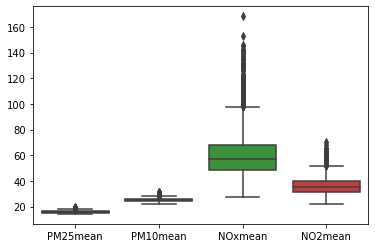

In [27]:
sns.boxplot(data=merge_df[['PM25mean', 'PM10mean','NOxmean','NO2mean']])

3. Create four scatter plots on a 2x2 grid in a single figure (use a loop) to visualise the relationship between area within 250m of a major road (in km$^2$) and the minimum values of each pollutant. As usual, [StackOverflow](https://stackoverflow.com/questions/45765735/arranging-multiple-for-loop-categorical-plots-with-seaborn) can help you here.

_Note:_ if you find this task difficult you may want to skip this exercise in practical to ensure you can work through the rest of the practical while help is available.

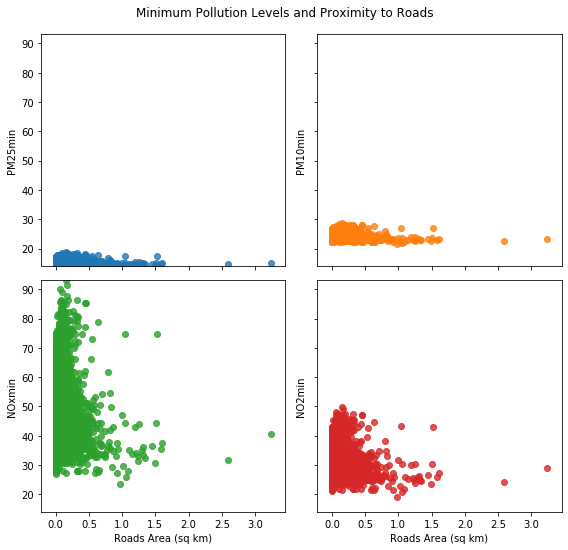

In [28]:
# the columns in merge_df we want to plot
target = ['PM25min', 'PM10min','NOxmin','NO2min']

# a new series to hold Roads Area in sq km (not sq m) [this will look tidier on the axes]
RoadsArea_km = merge_df['RoadsArea']/1000000

# setup the figure with four subplots in 2x2 format
# figsize tip from: https://stackoverflow.com/a/41666345
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(8,8))
axes = axes.flatten()

# loop over the axes and the columns -- 
# https://stackoverflow.com/questions/45765735
for ax, col in zip(axes, merge_df[target].columns):
    
    b = sns.regplot(x=RoadsArea_km, y=col, data=merge_df, ax=ax, fit_reg=False)  
    
    # Set common y-limits
    ax.set(ylim=[merge_df[target].min().min(), merge_df[target].max().max()])
    
    #next if statement is a hack to only print lower x-axis lavels
    if(ax==axes[0] or ax==axes[1]): 
        ax.set(xlabel='')
    else:
        ax.set(xlabel='Roads Area (sq km)')
    
    if(ax==axes[1] or ax==axes[3]):
        ax.set_yticklabels([])

plt.suptitle("Minimum Pollution Levels and Proximity to Roads")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## Grouping Data

Often in geographical data, we have data specified for different aerial units; counties, State parks, constituencies, etc. And frequently, these are units are hierarchical; counties are sub-units within states (e.g. Yorkshire is within England), postcode units within postcode areas (e.g. WC2R 2LS is within WC2R). This is particularly true for census data and so for the data we are working with; Lower Super Output Areas (LSOAs) are within London Boroughs. 

If we want to investigate differences or similarities at the borough-level, we are going to have to group the data for individual LSOAs into their respective boroughs. Then we can summarise the boroughs as a whole. 

As you can see from the [metadata](https://github.com/kingsgeocomp/geocomputation/blob/master/data/LSOA_metadata.xlsx?raw=true), the _LAD11CD_ and _LAD11NM_ columns contains Local Authority District (i.e. Borough) IDs and names. These columns are useful as they specify for every LSOA (which are on different rows) and ID and the name of the borough each LSOA lies within. 

We could check the contents of these columns using the `unique()` method:

In [29]:
print(merge_df.LAD11NM.unique())

['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster']


There are two ways we could use these columns to analyse our data at the borough level:
1. create new `Dataframes` for each individual borough
2. tell pandas to group the data using the values in the borough column 

The first approach might be useful if we want to examine one or few particular boroughs in detail. We could create these new `DataFrames` using the selection methods we have seen previously (but also [others you could learn about](http://pandas.pydata.org/pandas-docs/stable/indexing.html)). However, if we want to work with data for all London boroughs, this method would not be particularly easy to work with. 

So for the second approach, the pandas library has another data structure known as `DataFrameGroupBy` which is useful in this situation (see [documentation here](http://pandas.pydata.org/pandas-docs/stable/groupby.html)). We'll examine this approach in more detail now. 

In [30]:
my_df.groupby('LAD11NM')

In [31]:
boroughs = my_df.groupby('LAD11NM')
boroughs.head(1)

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,SumPrice,MeanPrice,MedianPrice,EntireHome,PrivateRoom,SharedRoom,SmallHost,MultiHost,PropertyCount,Area
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,2589.0,152.294118,146.0,14.0,1.0,2.0,11.0,6.0,17.0,1.333208e+05
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,30.0,30.000000,30.0,0.0,1.0,0.0,1.0,0.0,1.0,1.441958e+05
111,E01000115,Barnet 009A,E02000032,Barnet 009,E09000003,Barnet,E12000007,London,1484,1460,...,225.0,56.250000,60.0,1.0,3.0,0.0,1.0,3.0,4.0,2.798218e+05
320,E01000325,Bexley 014A,E02000078,Bexley 014,E09000004,Bexley,E12000007,London,1610,1610,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.914890e+05
465,E01000471,Brent 026A,E02000118,Brent 026,E09000005,Brent,E12000007,London,1638,1638,...,70.0,70.000000,70.0,1.0,0.0,0.0,1.0,0.0,1.0,1.394025e+05
631,E01000645,Bromley 007A,E02000133,Bromley 007,E09000006,Bromley,E12000007,London,1375,1375,...,279.0,139.500000,139.5,1.0,1.0,0.0,2.0,0.0,2.0,7.787119e+05
824,E01000842,Camden 011A,E02000176,Camden 011,E09000007,Camden,E12000007,London,1444,1368,...,2588.0,123.238095,120.0,17.0,4.0,0.0,13.0,8.0,21.0,1.036986e+05
957,E01000975,Croydon 022A,E02000215,Croydon 022,E09000008,Croydon,E12000007,London,1613,1607,...,349.0,87.250000,87.0,4.0,0.0,0.0,3.0,1.0,4.0,1.868396e+05
1176,E01001195,Ealing 021A,E02000258,Ealing 021,E09000009,Ealing,E12000007,London,1833,1833,...,370.0,61.666667,55.0,2.0,4.0,0.0,4.0,2.0,6.0,4.127859e+05
1369,E01001390,Enfield 036A,E02000312,Enfield 036,E09000010,Enfield,E12000007,London,1971,1971,...,463.0,51.444444,38.0,3.0,6.0,0.0,9.0,0.0,9.0,1.521327e+05


In [32]:
boroughs.get_group("City of London")  

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,SumPrice,MeanPrice,MedianPrice,EntireHome,PrivateRoom,SharedRoom,SmallHost,MultiHost,PropertyCount,Area
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,2589.0,152.294118,146.0,14.0,1.0,2.0,11.0,6.0,17.0,1.333208e+05
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,2697.0,149.833333,117.5,12.0,5.0,1.0,13.0,5.0,18.0,2.261913e+05
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,1049.0,87.416667,89.5,7.0,5.0,0.0,12.0,0.0,12.0,5.730297e+04
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,5360.0,105.098039,95.0,36.0,14.0,1.0,30.0,21.0,51.0,1.907388e+05
4674,E01032739,City of London 001F,E02000001,City of London 001,E09000001,City of London,E12000007,London,1044,1002,...,24230.0,170.633803,168.0,128.0,13.0,1.0,39.0,103.0,142.0,1.658496e+06
4675,E01032740,City of London 001G,E02000001,City of London 001,E09000001,City of London,E12000007,London,1099,1049,...,9324.0,143.446154,135.0,54.0,11.0,0.0,28.0,37.0,65.0,6.393493e+05


Note that to access the data for this group, we pass a value from the column we used to define the groups using `groupby()` previously. As we used _LAD11NM_ to specify our groups above, here we were able to type the name we wanted (_"City of London"_). But if we had used _LAD11CD_ to specify the groups, we would have had to pass _E09000001_.

In [33]:
boroughs.get_group('Tower Hamlets').sample(4, random_state=42)[['LSOA11CD','LAD11NM','USUALRES','HHOLDRES']]

,LSOA11CD,LAD11NM,USUALRES,HHOLDRES
4215,E01004324,Tower Hamlets,1574,1570
4117,E01004218,Tower Hamlets,1750,1750
4180,E01004287,Tower Hamlets,2171,2171
4195,E01004303,Tower Hamlets,2362,2362


But when we try to get the shape of the object we find it's slightly different from a normal `DataFrame` (you should get an error if you try this):
```python
boroughs.shape
```

We can’t use `shape` to find out how many elements in the boroughs `DataFrameGroupBy` object, but we can use our old favourite function `len()` (which works pretty much anywhere!). Compare the output for the next two lines of code:

In [34]:
len(boroughs) 

33

In [35]:
len(merge_df)

4835

The length of `boroughs` is the number of groups in the `DataFrameGroupBy` object, whereas the length of `merge_df` is the number of rows in the `DataFrame` object. Check you understand the difference! We can tell from this that there are 33 boroughs (groups) and 4835 LSOAs (rows).

The difference between `merge_df` and `boroughs` also results in different output for other methods. Compare the output of the following:

In [36]:
boroughs["LAD11NM"].count()

LAD11NM
Barking and Dagenham      110
Barnet                    211
Bexley                    146
Brent                     173
Bromley                   197
Camden                    133
City of London              6
Croydon                   220
Ealing                    196
Enfield                   183
Greenwich                 151
Hackney                   144
Hammersmith and Fulham    113
Haringey                  145
Harrow                    137
Havering                  150
Hillingdon                161
Hounslow                  142
Islington                 123
Kensington and Chelsea    103
Kingston upon Thames       98
Lambeth                   178
Lewisham                  169
Merton                    124
Newham                    164
Redbridge                 161
Richmond upon Thames      115
Southwark                 166
Sutton                    121
Tower Hamlets             144
Waltham Forest            144
Wandsworth                179
Westminster               128
Na

In [37]:
merge_df["LAD11NM"].count()

4835

See how the `count` method for the `DataFrameGroupBy` object gives the count of LSOAs within in each borough (group) whereas the count method for the `DataFrame` object simply gives the count of the total number of LSOAs (rows). 

Note, the following two lines of input code would do exactly the same as the last two but using dot notation
```python
boroughs.LAD11NM.count()
merge_df.LAD11NM.count()
```

Using the `DataFrameGroupBy` object also allows us to describe the data by group (rather than for all of the LSOAs as we did before). For example, to find the mean values for the columns by borough we can use the `aggregate()` method: 

In [38]:
boroughs[['USUALRES','HHOLDRES','MedianPrice']].aggregate(np.mean).sample(5, random_state=42)

,USUALRES,HHOLDRES,MedianPrice
LAD11NM,,,
Wandsworth,1715.055866,1685.184358,71.743017
Havering,1581.546667,1571.140000,20.173333
Richmond upon Thames,1626.000000,1600.852174,86.730435
Hounslow,1788.429577,1774.373239,50.873239
Ealing,1726.780612,1707.780612,42.257653


Note how the `aggregate()` method makes a call to the numpy function `mean`; this is why we needed to `import numpy as np` in the setup section at the start of the notebook. 

In [39]:
boroughs[['MedianPrice']].aggregate(['min', np.median, np.mean, max]).sample(5, random_state=42)

MedianPrice                         
                             min median       mean    max
LAD11NM                                                  
Wandsworth                  29.5   70.0  71.743017  175.0
Havering                     0.0    0.0  20.173333  240.0
Richmond upon Thames         0.0   79.0  86.730435  350.0
Hounslow                     0.0   45.0  50.873239  420.0
Ealing                       0.0   40.0  42.257653  183.0

The `aggregate` method returns a `DataFrame`. Check this by:
1. printing the type of object of `bMeans` 
2. printing the `POPDEN` and `HHOLDS` columns of the new `DataFrame`

In [40]:
bMeans = boroughs[['USUALRES','HHOLDRES','MedianPrice']].aggregate(np.mean)
type(bMeans)

pandas.core.frame.DataFrame

In [41]:
print(bMeans[['USUALRES','HHOLDRES']].sample(5, random_state=42))

                         USUALRES     HHOLDRES
LAD11NM                                       
Wandsworth            1715.055866  1685.184358
Havering              1581.546667  1571.140000
Richmond upon Thames  1626.000000  1600.852174
Hounslow              1788.429577  1774.373239
Ealing                1726.780612  1707.780612


Check you understand what has been produced here; `bMeans` contains the mean (average) of all columns in our original dataset but aggregated (grouped) by borough.

There are other methods we can use on `DataFrameGroupBy`, for example `get_group()` gets the data (for LSOAs) for just one of the groups (boroughs):

### Asking questions about boroughs

Let’s see how this all might be useful for answering a geographical question. Say we want to calculate what proportion of the population of the Borough of Harrow that identifies as 'White' ethnicity:

In [42]:
boroughs = merge_df.groupby('LAD11NM')  #as above  
bSums = boroughs.aggregate(np.sum)      #sum of columns grouped by borough

harrow_sumW = bSums.White.loc["Harrow"]          #note: equivalent using dot notation is harrow_sumW = bSums.White.Harrow   
harrow_sumRes = bSums.USUALRES.loc["Harrow"]     #note: equivalent using dot notation is harrow_sumRes = bSums.USUALRES.Harrow

harrow_propW =  float(harrow_sumW) / float(harrow_sumRes)                 #convert to float when calculating proportion 
print("The proportion of Harrow that is White ethnicity is: {0:.3f}".format(harrow_propW))   #print nicely

The proportion of Harrow that is White ethnicity is: 0.422


Run the code above and check that you find that the proportion is 0.422. 

### Iterating over `DataFrameGroupBy`

Finally, a short note to highlight that [iterating over groups](http://pandas.pydata.org/pandas-docs/stable/groupby.html#iterating-through-groups) in a `DataFRameGroupBy` object is much the same as looping over many other objects in python. For example, to iterate over all boroughs (groups) printing out the total population of each: 

In [43]:
boroughs = merge_df.groupby('LAD11NM')

for key, value in boroughs:
    popn = value.USUALRES.sum()
    print("{0:8.0f} people in {1}".format(popn,key))

  185911 people in Barking and Dagenham
  356386 people in Barnet
  231997 people in Bexley
  311215 people in Brent
  309392 people in Bromley
  220338 people in Camden
    7375 people in City of London
  363378 people in Croydon
  338449 people in Ealing
  312466 people in Enfield
  254557 people in Greenwich
  246270 people in Hackney
  182493 people in Hammersmith and Fulham
  254926 people in Haringey
  239056 people in Harrow
  237232 people in Havering
  273936 people in Hillingdon
  253957 people in Hounslow
  206125 people in Islington
  158649 people in Kensington and Chelsea
  160060 people in Kingston upon Thames
  303086 people in Lambeth
  275885 people in Lewisham
  199693 people in Merton
  307984 people in Newham
  278970 people in Redbridge
  186990 people in Richmond upon Thames
  288283 people in Southwark
  190146 people in Sutton
  254096 people in Tower Hamlets
  258249 people in Waltham Forest
  306995 people in Wandsworth
  219396 people in Westminster


Have a think about what the code above does:
1. iterating over the groups returns a tuple composed of `key` and `value`
2.`value` allows us to get to the actual data in each group (borough)
3. we can use `key` to get the label of each group (in this case the values of `LAD11NM` used to create the `GroupBy` object)

Note, the above is just an example to show the structure of how to loop over `GroupBy` objects and we could have done much the same (although without the nice string formatting) using:

```python
print(boroughs.USUALRES.sum())
```

In [44]:
boroughs[['USUALRES','MeanPrice']].mean().sample(5, random_state=42)

,USUALRES,MeanPrice
LAD11NM,,
Wandsworth,1715.055866,94.211073
Havering,1581.546667,20.384127
Richmond upon Thames,1626.000000,114.085518
Hounslow,1788.429577,67.315538
Ealing,1726.780612,58.182921


In [45]:
def filter_func(x):
    return x['MeanPrice'].mean() > my_df['MeanPrice'].mean() + my_df['MeanPrice'].std()

print("Mean of whole df: {0:0.2f}".format(my_df.MeanPrice.mean()))
print("Mean of filtered df: {0:0.2f}".format(boroughs.filter(filter_func)[['MeanPrice']].mean()[0]))

Mean of whole df: 64.00
Mean of filtered df: 146.62


In [46]:
def grp_standardise(x):
    # x is a DataFrame of group values
    x['Std'] = (x.MeanPrice-x.MeanPrice.mean())/x.MeanPrice.std()
    return x

my_df.groupby('LAD11NM').apply(grp_standardise).sample(10, random_state=42)[['LAD11NM','MeanPrice','Std']]

,LAD11NM,MeanPrice,Std
3317,Merton,0.000000,-1.184283
2533,Hounslow,33.500000,-0.305356
1041,Croydon,0.000000,-0.959154
3307,Merton,50.000000,-0.388438
4401,Wandsworth,64.923077,-0.889589
3898,Southwark,53.000000,-0.987547
1926,Haringey,48.750000,-0.531413
3094,Lambeth,63.333333,-0.522646
764,Bromley,60.000000,0.557629
3447,Newham,0.000000,-1.410577


#### Task 5

Similar to the exercises above for pollutants, but this time for borough-level data:

1. Find the total number of usual residents of the borough with highest **mean** value for each of the four pollutants.  

In [47]:
# Columns of interest
target = ['PM25mean', 'PM10mean','NOxmean','NO2mean']

# Maxima
mtarget = merge_df[target].max()

# Get the sum of usual residents
bSums = boroughs.apply(np.sum)[['USUALRES']]

# Loop
for t in target:
    b = merge_df[merge_df[t]==mtarget[t]][['LAD11NM']].iloc[0,0]
    bSums[bSums.index==b]
    print("{0:8.0f} usual residents are in the borough {1} with the highest {2} max of {3:6.2f}.".format(
                bSums[bSums.index==b]['USUALRES'][0], b, t, mtarget[t]))

  220338 usual residents are in the borough Camden with the highest PM25mean max of  19.52.
  219396 usual residents are in the borough Westminster with the highest PM10mean max of  31.35.
  219396 usual residents are in the borough Westminster with the highest NOxmean max of 168.37.
  219396 usual residents are in the borough Westminster with the highest NO2mean max of  70.71.


2. Create a barplot to compare the borough-level means of mean values of each of the four pollutants  

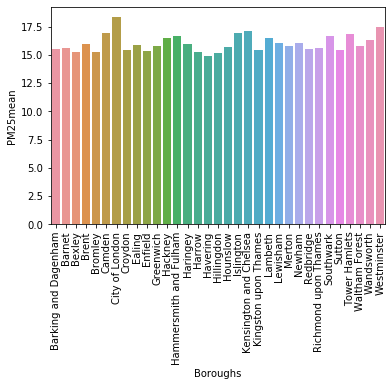

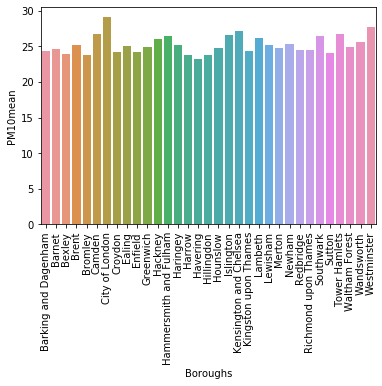

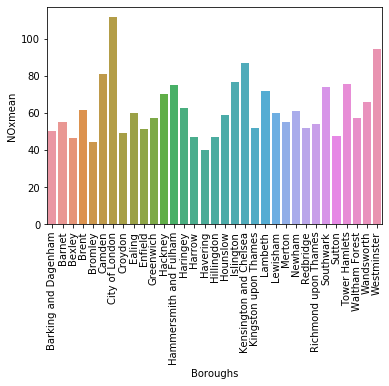

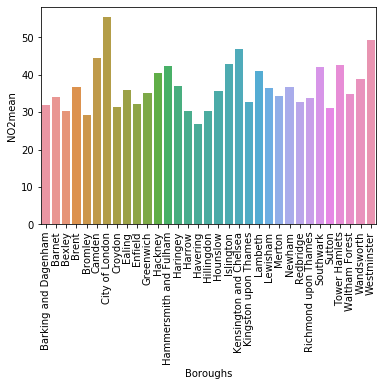

In [49]:
# Re-Run the aggregate
bMeans = boroughs.aggregate(np.mean)

#the columns in merge_df we want to plot
target = ['PM25mean', 'PM10mean','NOxmean','NO2mean']

#loop
for i, col in enumerate(bMeans[target].columns):
    fig, ax = plt.subplots()
    g = sns.barplot(x=bMeans.index, y=col, data=bMeans);
    ax.set(xlabel='Boroughs')
    plt.xticks(rotation=90)

## Pivot Tables

For simplicity (because the data is already available and not too large) I've shamelessly taken key parts of [this tutorial](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html) from the O'Reilly _Data Science Handbook_. I would suggest that you try performing your own pivot table analysis on the InsideAirbnb data that we started to work with as a 'supplementary' notebook a few weeks ago. I'd suggest looking at things like counts and median price by type of property and borough.

The reason that we don't use the 'usual' LSOA data we were working with above is that Pivot Tables work _best_ with low-level count data and our already-aggregated data doesn't yield much that is particularly exciting in that context. We _can_ build pivot tables, but they just aren't really worth the time.

So this is a dataset provided _by_ a library for demonstration purposes. Seaborn provides data on the survivors of the Titanic disaster, other libraries (_e.g._ PySAL) provided other demonstration data.

In [50]:
titanic = sns.load_dataset('titanic')
print(titanic.shape)
titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


So this is a _two-level_ grouping of the data (above we stuck to only one level) from which we derive the likelihood that someone of a given gender in a given class was likely to survive the disaster. If you're unclear what's going on try running this code in stages and exploring the data at each point: first, group by, then with survived, then with aggregate by mean (and for contrast type `count`!), and finally with `unstack`.

In [51]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


And here's the same output, but using the `pivot_table` syntax, which is quite a bit easier to frame intellectually.

In [52]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Here is a new function `cut` which takes a pandas Series of continuous data and cuts it up into bins. THis gives us a better sense of how survival was impacted by age and class.

In [53]:
age_range = pd.cut(titanic.age, [0, 18, 40, 65, 99])
titanic.pivot_table('survived', index=['sex',age_range], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 40]  0.979167  0.914894  0.480000
       (40, 65]  0.961538  0.846154  0.111111
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 40]  0.478261  0.063492  0.146199
       (40, 65]  0.282609  0.105263  0.068966
       (65, 99]  0.250000  0.000000  0.000000

# Summary 

In this practical we have:
1. had a recap of some sorting and selecting
2. seen how to take a random sample of data
3. introduced ourselves to the air quality data and combined it with our other data
4. learned about the `DataFrameGroupBy` data structure. 

You now have the 'full' data set (combining the original data with the air quality data) that you can use for your final report. So start exploring!

If you want to join your own LSOA data for analysis in your final report, please discuss with James before doing so. 

## Credits!

#### Contributors:
The following individuals have contributed to these teaching materials: Jon Reades (jonathan.reades@kcl.ac.uk), James Millington (james.millington@kcl.ac.uk)

#### License
These teaching materials are licensed under a mix of [The MIT License](https://opensource.org/licenses/mit-license.php) and the [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/).

#### Acknowledgements:
Supported by the [Royal Geographical Society](https://www.rgs.org/HomePage.htm) (with the Institute of British Geographers) with a Ray Y Gildea Jr Award.

#### Potential Dependencies:
This notebook may depend on the following libraries: pandas, matplotlib, seaborn